# Machine Learning Model

- Pada Notebook ini akan dibangun Supervised Machine Learning menggunakan metode Logisitic Regression, Decision Tree, Random Forest, dan K-Nearest Neighbors.
- Class label pada dataset tidak seimbang, label Not Churn : 5163, label Chrun : 1869. 
- Saya akan melakukan 4 percobaan:
    1. Training model menggunakan dataset Imbalance
    2. Training model menggunakan dataset balance (Under Sample)
    3. Training model menggunakan dataset balance (Random Over Sample)
    4. Training model menggunakan dataset balance Synthetic Minority Oversampling Technique(SMOTE)
- Untuk memilih model terbaik, saya akan mengambil model terbaik untuk setiap percobaan, kemudian membandingkan 4 model terbaik tersebut.
- Feature Monthly Charges dan Total Charges tidak akan digunakan sebagai variable prediktor dengan pertimbangan sebagai berikut :
    - 2 Feature tersebut merupakan feature dependent, hal ini sudah dibuktikan pada notebook EDA sebelumnya
    - Dalam membuat model Machine Learning, tidak ada keharusan untuk membuang feature yang dependent, namun dalam membuat model interface yang bisa digunakan oleh user, 2 feature ini akan menyulitkan user untuk melakukan input nilainya karena user tidak benar-benar tahu nilainya. Untuk mendapatkan nilai Monthly Charges dan Total Charges setiap perusahaan pasti sudah memiliki formula/perhitungan untuk menentukan harga, jika demikian kita bisa menggunakan feature ini sebagai prediktor, tapi pada kasus ini kita tidak memiliki formula tersebut.

- Sebelum saya benar benar membuang feature tersebut, saya akan melihat perbandingan model yang menggunakan 2 feature tersebut dan yang tidak menggunakan 2 feature tersebut.

## Load Library and Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV, GridSearchCV
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns", 22)
telcom = pd.read_csv('telcom_clean1.csv')
telcom.head()

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,0,0,0,1,1,1,0,1,1,0,...,0,0,1,0,0,1,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,0,0,0,0,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,1,1,1,1,0,1,0,...,0,0,1,0,0,1,0,0,-1.239504,0.196178,-0.940457


In [4]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 43 columns):
customerID                                 7032 non-null object
SeniorCitizen                              7032 non-null int64
Partner                                    7032 non-null int64
Dependents                                 7032 non-null int64
PhoneService                               7032 non-null int64
PaperlessBilling                           7032 non-null int64
Churn                                      7032 non-null int64
gender_Female                              7032 non-null int64
gender_Male                                7032 non-null int64
MultipleLines_No                           7032 non-null int64
MultipleLines_No phone service             7032 non-null int64
MultipleLines_Yes                          7032 non-null int64
InternetService_DSL                        7032 non-null int64
InternetService_Fiber optic                7032 non-null int64
InternetSe

# 1. Percobaan 1 (Imbalance Dataset)

- Training Model menggunakan Imbalance dataset
- Pada Model ini saya akan menggunakan semua feature sebagai variable prediktor kecuali Customer ID
- Untuk melakukan prediksi, saya akan menggunakan model klasifikasi Logistic Regression, Decision Tree,Random Forest, dan K-Nearest Neighbors.

### Spliting Data

In [5]:
## train test split
pd.set_option("display.max_columns", 33)
#splitting train and test data 
feature    = telcom.drop(columns=['customerID','Churn'])
target = telcom['Churn']
train_X,test_X,train_Y,test_Y = train_test_split(feature,target,test_size = .25,random_state=123)
feature.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'gender_Female', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', '

### Deklarasi Model

Deklarasi model menggunakan parameter default

__Logistic Regression__

In [6]:
### Logistic Regression
lr = LogisticRegression()
lr.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

__Decision Tree__

In [7]:
### Decision Tree
dct = DecisionTreeClassifier()
dct.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

__Random Forest__

In [8]:
### Random Forest
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__K-Nearest Neighbors__

In [9]:
### KNN
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Evaluation

__1. Confusion Matrix__

Pada tahap ini saya akan melihat hasil klasifikasi dalam bentuk Confusion matrix, Confusion matrix adalah tabel yang terdiri dari data aktual dan data prediksi, tabel ini digunakan dengan tujuan untuk
mengukur kinerja suatu model klasifikasi. Berikut ini merupakan tabel klasifikasi churning customer

-|pred "No Churn"|pred "Churn"
---|---|---
__aktual "No Churn"__|__TN__|__FP__
__aktual "Churn"__|__FN__|__TP__

- True Negative (TN) adalah jumlah pelanggan dengan nilai aktual non churn, dan diprediksi non churn.
- False Positive (FP) adalah jumlah pelanggan dengan nilai aktual non churn, tapi diprediksi churn.
- True Positive (TP) adalah jumlah pelanggan dengan nilai aktual churn, dan diprediksi churn.
- False Negative (FN) adalah jumlah pelanggan dengan nilai aktual churn, tapi diprediksi non churn.

__Noted__ : Pada model ini, No Churn dilabeli dengan angka 0, sedangkan Churn dilabeli dengan angka 1

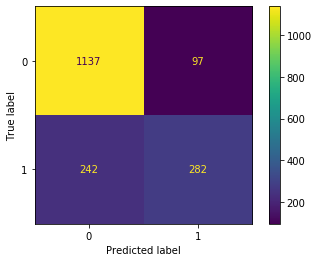

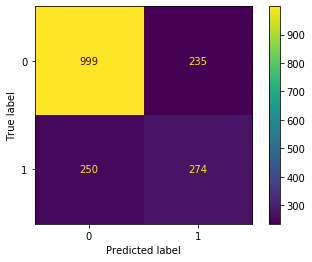

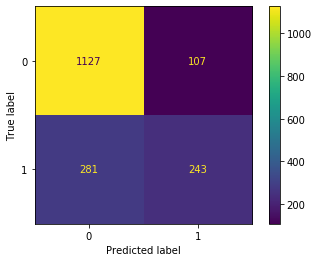

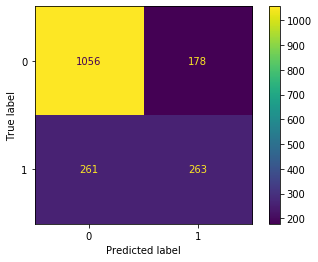

In [10]:
plot_confusion_matrix(lr,test_X,test_Y,values_format='0.0f')
plot_confusion_matrix(dct,test_X,test_Y,values_format='0.0f')
plot_confusion_matrix(rf,test_X,test_Y,values_format='0.0f')
plot_confusion_matrix(knn,test_X,test_Y,values_format='0.0f')

__2. Evaluation Matrix__

Untuk melakukan evaluasi bisa dilakukan dengan menghitung Precision, Recall, F1 Score, dan Accuracy

- _Precision_ dihitung untuk mengevaluasi seberapa baik ketepatan model dapat memprediksi suatu kelas.
$$\displaystyle Precision(1) = \frac {TP}{TP + FP}$$
$$\displaystyle Precision(0) = \frac {TN}{TN + FN}$$

- _Recall_ dihitung untuk mengevaluasi seberapa besar coverage suatu model dalam memprediksi suatu
kelas tertentu. Recall positif disebut Sensitivity, untuk Recall Negatif disebut Specify.
    - _Sensitivity_ merupakan frekuensi relatif dari memprediksi suatu kejadian yang terjadi ketika kejadian tersebut memang terjadi
    - _Specify_ merupakan frekuensi relatif dari memprediksi suatu kejadian yang tidak terjadi ketika kejadian tersebut memang tidak terjadi
$$\displaystyle Recall(1)/Sensitivity = \frac {TP}{TP + FN}$$
$$\displaystyle Recall(0)/Specify = \frac {TN}{TN + FP}$$

- _F1 Score_ adalah perhitungan kombinasi antara _recall_ dan _precision_ , bisa dikatakan harmonic / rata-rata tertimbang antara _recall_ dan _precision_
$$\displaystyle F1 Score(1) = 2 \cdot \frac {Recall(1) \cdot Precision(1)}{Recall(1) + Precision(1)}$$

$$\displaystyle F1 Score(0) = 2 \cdot \frac {Recall(0) \cdot Precision(0)}{Recall(0) + Precision(0)}$$

- _Accuracy_ merupakan ukuran seberapa akurat model memprediksi data, dihitung berdasarkan total prediksi benar dibagi total semua prediksi
$$\displaystyle Accuracy = \frac {TP + TN}{TP + TN + FP + FN}$$

In [11]:
print('Logistic Regressin\n',classification_report(test_Y,lr.predict(test_X)))
print('\n\nDecisionTree\n',classification_report(test_Y,dct.predict(test_X)))
print('\n\nRandom Forest\n',classification_report(test_Y,rf.predict(test_X)))
print('\n\nKNN\n',classification_report(test_Y,knn.predict(test_X)))

Logistic Regressin
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1234
           1       0.74      0.54      0.62       524

    accuracy                           0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758



DecisionTree
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1234
           1       0.54      0.52      0.53       524

    accuracy                           0.72      1758
   macro avg       0.67      0.67      0.67      1758
weighted avg       0.72      0.72      0.72      1758



Random Forest
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1234
           1       0.69      0.46      0.56       524

    accuracy                           0.78      1758
   macro avg       0.75      0.69      0.70      1758
weighted avg       0.

__3. ROC and AUC__

- __ROC (Receiver Operating Characteristics)__ kurva tentang true positive rate (TPR) vs false positive rate (FPR) sebagai fungsi threshold dari sebuah model untuk mengklasifikasikan kelas positif. 

$$\displaystyle TPR = \frac {TP}{TP+FN}$$

$$\displaystyle FPR = \frac {FP}{TN+FP}$$

- __AUC (Area Under the Curve)__ Matric untuk mengkalkulasi perfoma secara keseluruhan dari model klasifikasi berdasarkan area di bawah kurva ROC, luas maksimal AUC adalah 1, semakin tinggi AUC artinya model semakin baik

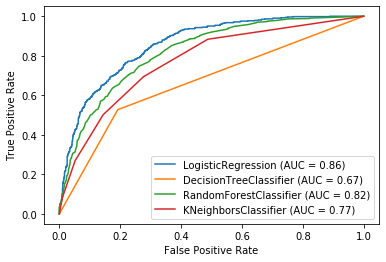

In [12]:
display = plot_roc_curve(lr,test_X,test_Y)
plot_roc_curve(dct,test_X,test_Y,ax=display.ax_)
plot_roc_curve(rf,test_X,test_Y,ax=display.ax_)
plot_roc_curve(knn,test_X,test_Y,ax=display.ax_)

__Noted__ : Dalam evaluasi model ini saya menggunakan data test imbalance, karena model ini dibangun untuk memeprediksi kemungkinan customer untuk churning (memprediksi class label : 1), saya akan menggunakan __AUC__ , __F1 Score__ untuk class label : 1  dan __Recall(1) / Sensitivity__ sebagai acuan utama mengukur peforma model.

Dari data report di atas, __Logistic Regression__ merupakan model terbaik dengan Sensitivity, F1 Score, dan AUC tertingi

### Hyperparameter Tuning 

Hyperparameter Tuning bertujuan untuk menentukan parameter terbaik dari setiap model sehingga peforma model bisa ditingkatkan, saya akan menggunakan ```RandomizedSearchCV``` untuk melakukan parameter tuning.

Pada proses hyper parameter ini saya mengunakan ```CrossValidation``` dengan 5 fold/lipatan. Karena menggunakan class imbalance, pada hyperparameter saya menggunakan scoring __F1 Score__

__Parameter Tuning Logistic Regression__

In [13]:
def tuning(model,parameter,n_cv):
    random = RandomizedSearchCV(model, parameter, cv = n_cv,scoring='f1')
    random.fit(train_X,train_Y)
    best_param = random.best_params_
    
    return best_param

In [14]:
# lr_tune = LogisticRegression()
# weights = np.linspace(0.05, 0.95, 20)
# param_lr = {
#     'solver':['newton-cg','lbfgs','liblinear','sag','saga'], ##algoritma Logistic regression
#     'penalty':['none','l1','l2','elasticnet','none'], # regularisasi
#     'class_weight': [{0: x, 1: 1.0-x} for x in weights],  # bobot masing2 class
#       'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] #strong of regularisasi
# }

# param_best = tuning(lr_tune,param_lr,5)
# param_best

# {'solver': 'liblinear',
#  'penalty': 'l1',
#  'class_weight': {0: 0.33421052631578946, 1: 0.6657894736842105},
#  'C': 0.1}

In [15]:
lr_tune = LogisticRegression(penalty='none',solver='saga',C=0.1,
                             class_weight= {0: 0.33421052631578946, 1: 0.6657894736842105})
lr_tune.fit(train_X,train_Y)

LogisticRegression(C=0.1,
                   class_weight={0: 0.33421052631578946, 1: 0.6657894736842105},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=None, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

__Parameter Tuning Decision Tree__

In [16]:
# dct_tune = DecisionTreeClassifier()
# weights = np.linspace(0.05, 0.95, 20)
# param = {
#     'criterion':['gini','entropy'], ## algoritma tree
#     'max_depth': [int(x) for x in np.linspace(10, 100, 10)],
#     "min_samples_split":[int(x) for x in np.linspace(1, 10, 10)],
#     "min_samples_leaf":[int(x) for x in np.linspace(1, 10, 10)],
#     'class_weight': [{0: x, 1: 1.0-x} for x in weights] 
# }

# param_best = tuning(dct_tune,param,5)
# param_best

# {'min_samples_split': 3,
#  'min_samples_leaf': 7,
#  'max_depth': 40,
#  'criterion': 'gini',
#  'class_weight': {0: 0.381578947368421, 1: 0.618421052631579}}

In [17]:
dct_tune = DecisionTreeClassifier(criterion='gini',min_samples_split=3,min_samples_leaf=7,max_depth=40,
                                 class_weight={0: 0.381578947368421, 1: 0.618421052631579})
dct_tune.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0,
                       class_weight={0: 0.381578947368421,
                                     1: 0.618421052631579},
                       criterion='gini', max_depth=40, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=7,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

__Parameter Tuning Random Forest__

In [18]:
# rf_tune = RandomForestClassifier()
# weights = np.linspace(0.05, 0.95, 20)
# param_rf= {
#     'n_estimators': [10,50,100], ## jumlah tree
#     'criterion':['gini','entropy'], ## algoritma tree
#     'bootstrap':[False,True], ## bootsrap / not
#     'max_depth': [int(x) for x in np.linspace(10, 100, 10)],
#     "min_samples_split":[int(x) for x in np.linspace(1, 10, 10)],
#     "min_samples_leaf":[int(x) for x in np.linspace(1, 10, 10)],
#     'class_weight': [{0: x, 1: 1.0-x} for x in weights] 
# }

# param_best = tuning(rf_tune,param_rf,5)
# param_best

# {'n_estimators': 50,
#  'min_samples_split': 5,
#  'min_samples_leaf': 7,
#  'max_depth': 80,
#  'criterion': 'gini',
#  'class_weight': {0: 0.33421052631578946, 1: 0.6657894736842105},
#  'bootstrap': False}

In [19]:
rf_tune = RandomForestClassifier(n_estimators = 500,criterion='gini',bootstrap=False,min_samples_split=5,
                                 min_samples_leaf=7,max_depth=80,
                                 class_weight={0: 0.33421052631578946, 1: 0.6657894736842105})
rf_tune.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight={0: 0.33421052631578946,
                                     1: 0.6657894736842105},
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__Parameter Tuning KNN__

In [20]:
# knn_tune = KNeighborsClassifier()

# param_knn = {
#         'n_neighbors' : list(range(50,100)), ## jumlah n neighbors
#         'weights':['uniform','distance'], ## one man one vote , lebih dekat lebih berbobot
#         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], # struktur data
# }

# param_best = tuning(knn_tune,param_knn,5)
# param_best

# {'algorithm':'auto','n_neighbors':64,'weights' : 'uniform'}

In [21]:
knn_tune = KNeighborsClassifier(algorithm='auto',n_neighbors=64,weights='uniform')
knn_tune.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=64, p=2,
                     weights='uniform')

### Final Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1234
           1       0.74      0.54      0.62       524

    accuracy                           0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758



Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1234
           1       0.61      0.71      0.66       524

    accuracy                           0.78      1758
   macro avg       0.74      0.76      0.75      1758
weighted avg       0.79      0.78      0.78      1758


Decision Tree Default
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1234
           1       0.54      0.52      0.53       524

    accuracy                           0.72      1758
   macro avg       0.67      0.67      0.67  

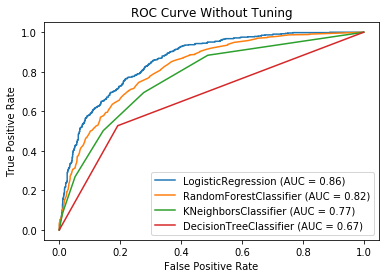

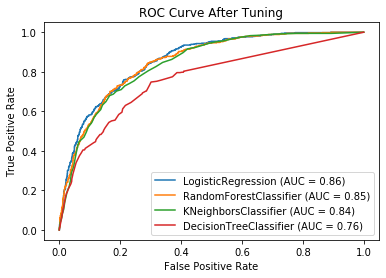

In [22]:
def eva_matrix(lr,lr_tune,dct,dct_tune,rf,rf_tune,knn,knn_tune,test_X,test_Y):
    ## Report
    print('Logistic Regression Default\n',classification_report(test_Y,lr.predict(test_X)))
    print('\n\nLogistic Regression Tuning\n',classification_report(test_Y,lr_tune.predict(test_X)))
    print('========================================================================')
    print('\nDecision Tree Default\n',classification_report(test_Y,dct.predict(test_X)))
    print('\nDecision Tree Tuning\n',classification_report(test_Y,dct_tune.predict(test_X)))
    print('========================================================================')
    print('\nRandom Forest Default\n',classification_report(test_Y,rf.predict(test_X)))
    print('\nRandom Forest Tuning\n',classification_report(test_Y,rf_tune.predict(test_X)))
    print('========================================================================')
    print('\nKNN Default\n',classification_report(test_Y,knn.predict(test_X)))
    print('\nKNN Tuning\n',classification_report(test_Y,knn_tune.predict(test_X)))

    ## ROC_AUC
    display = plot_roc_curve(lr,test_X,test_Y)
    plot_roc_curve(rf,test_X,test_Y,ax=display.ax_)
    plot_roc_curve(knn,test_X,test_Y,ax=display.ax_)
    plot_roc_curve(dct,test_X,test_Y,ax=display.ax_)
    plt.title('ROC Curve Without Tuning')

    disp = plot_roc_curve(lr_tune,test_X,test_Y)
    plot_roc_curve(rf_tune,test_X,test_Y,ax=disp.ax_)
    plot_roc_curve(knn_tune,test_X,test_Y,ax=disp.ax_)
    plot_roc_curve(dct_tune,test_X,test_Y,ax=disp.ax_)
    plt.title('ROC Curve After Tuning')

eva_matrix(lr,lr_tune,dct,dct_tune,rf,rf_tune,knn,knn_tune,test_X,test_Y)

In [23]:
def df_report(lr,lr_tune,dct,dct_tune,rf,rf_tune,knn,knn_tune,test_X,test_Y):
    ## ROC-AUC
    a = roc_auc_score(test_Y, lr.predict_proba(test_X)[:,1])
    b = roc_auc_score(test_Y, lr_tune.predict_proba(test_X)[:,1])
    c = roc_auc_score(test_Y, dct.predict_proba(test_X)[:,1])
    d = roc_auc_score(test_Y, dct_tune.predict_proba(test_X)[:,1])
    e = roc_auc_score(test_Y, rf.predict_proba(test_X)[:,1])
    f = roc_auc_score(test_Y, rf_tune.predict_proba(test_X)[:,1])
    g = roc_auc_score(test_Y, knn.predict_proba(test_X)[:,1])
    h = roc_auc_score(test_Y, knn_tune.predict_proba(test_X)[:,1])


    ## Accuracy
    i = classification_report(test_Y,lr.predict(test_X),output_dict=True)['accuracy']
    j = classification_report(test_Y,lr_tune.predict(test_X),output_dict=True)['accuracy']
    k = classification_report(test_Y,dct.predict(test_X),output_dict=True)['accuracy']
    l = classification_report(test_Y,dct_tune.predict(test_X),output_dict=True)['accuracy']
    m = classification_report(test_Y,rf.predict(test_X),output_dict=True)['accuracy']
    n = classification_report(test_Y,rf_tune.predict(test_X),output_dict=True)['accuracy']
    o = classification_report(test_Y,knn.predict(test_X),output_dict=True)['accuracy']
    p = classification_report(test_Y,knn_tune.predict(test_X),output_dict=True)['accuracy']


    ## Precision,Recall,F1
    q = classification_report(test_Y,lr.predict(test_X),output_dict=True)['1']
    r = classification_report(test_Y,lr_tune.predict(test_X),output_dict=True)['1']
    s = classification_report(test_Y,dct.predict(test_X),output_dict=True)['1']
    t = classification_report(test_Y,dct_tune.predict(test_X),output_dict=True)['1']
    u = classification_report(test_Y,rf.predict(test_X),output_dict=True)['1']
    v = classification_report(test_Y,rf_tune.predict(test_X),output_dict=True)['1']
    w = classification_report(test_Y,knn.predict(test_X),output_dict=True)['1']
    x = classification_report(test_Y,knn_tune.predict(test_X),output_dict=True)['1']


    auc = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression Tune','Decision Tree','Decision Tree Tune',
                                 'Random Forest','Random Forest Tune','KNN','KNN Tune'],
                          'AUC':[a,b,c,d,e,f,g,h],
                          'Accuracy':[i,j,k,l,m,n,o,p]})
    precision = pd.DataFrame([q,r,s,t,u,v,w,x])
    precision.drop(columns='support',inplace=True)
    df = pd.concat([auc,precision],axis=1)
    return df

report0 = df_report(lr,lr_tune,dct,dct_tune,rf,rf_tune,knn,knn_tune,test_X,test_Y)
report0

,Model,AUC,Accuracy,precision,recall,f1-score
0,Logistic Regression,0.858847,0.807167,0.744063,0.538168,0.624585
1,Logistic Regression Tune,0.859038,0.779863,0.612479,0.711832,0.658429
2,Decision Tree,0.667587,0.724118,0.538310,0.522901,0.530494
3,Decision Tree Tune,0.761914,0.738908,0.560976,0.570611,0.565752
4,Random Forest,0.821092,0.779295,0.694286,0.463740,0.556064
5,Random Forest Tune,0.851491,0.792947,0.653257,0.650763,0.652008
6,KNN,0.771484,0.750284,0.596372,0.501908,0.545078
7,KNN Tune,0.842080,0.788965,0.683453,0.543893,0.605739


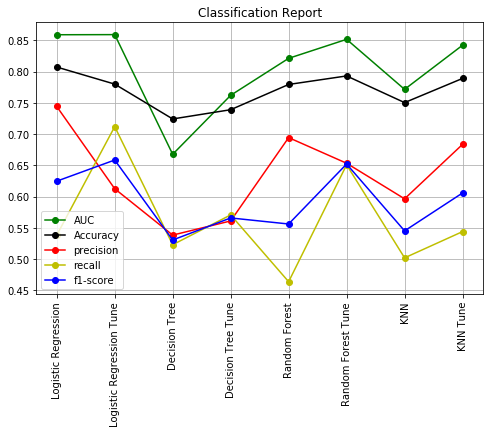

In [24]:
def plot_report(report):
    plt.figure(figsize=(8,5))
    plt.plot(report['Model'], report['AUC'],'g-o',label='AUC')
    plt.plot(report['Model'], report['Accuracy'],'k-o',label='Accuracy')
    plt.plot(report['Model'], report['precision'],'r-o',label='precision')
    plt.plot(report['Model'], report['recall'],'y-o',label='recall')
    plt.plot(report['Model'], report['f1-score'],'b-o',label='f1-score')
    plt.xticks(rotation=90);plt.title('Classification Report')
    plt.grid(True)
    plt.legend()
    plt.show()
    
plot_report(report0)

- Seteleh dilakukan hyperparameter tuning, semua model mengalami peningkatan peforma, __Logistic Regression Tune__ merupakan model terbaik dengan __Recall__, __F1 Score__ dan __AUC__ tertinggi

## Exclude Feature Monthly Charges dan Total Charges

Pada Model ini saya tidak akan menggunakan Monthly Charges dan Total Charges untuk memprediksi model. Kemudian saya akan membandingkan dengan model sebelumnya yang menggunakan feature MonthlyCharges dan Total Charges

### Spliting Data

In [25]:
#splitting train and test data 
train_X1 = train_X.drop(columns=['MonthlyCharges','TotalCharges'])
test_X1 = test_X.drop(columns=['MonthlyCharges','TotalCharges'])
train_Y1 = train_Y.copy()
test_Y1 = test_Y.copy()
test_Y1.value_counts()

0    1234
1     524
Name: Churn, dtype: int64

### Deklarasi Model

Deklarasi model menggunakan parameter default

In [26]:
### Logistic Regression
lr1 = LogisticRegression()
lr1.fit(train_X1,train_Y1)

### Decision Tree
dct1 = DecisionTreeClassifier()
dct1.fit(train_X1,train_Y1)

rf1 = RandomForestClassifier()
rf1.fit(train_X1,train_Y1)

knn1 = KNeighborsClassifier()
knn1.fit(train_X1,train_Y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Hyper Parameter Tuning

__Logistic Regression__

In [27]:
def tuning(model,parameter,n_cv):
    random = RandomizedSearchCV(model, parameter, cv = n_cv,scoring='f1')
    random.fit(train_X1,train_Y1)
    best_param = random.best_params_
    
    return best_param

In [28]:
# lr1_tune = LogisticRegression()
# weights = np.linspace(0.05, 0.95, 20)
# param_lr = {
#     'solver':['newton-cg','lbfgs','liblinear','sag','saga'], ##algoritma Logistic regression
#     'penalty':['none','l1','l2','elasticnet','none'], # regularisasi
#     'class_weight': [{0: x, 1: 1.0-x} for x in weights],
#       'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] #strong of regularisasi
# }

# param_best = tuning(lr1_tune,param_lr,5)
# param_best

# {'solver': 'liblinear',
#  'penalty': 'l1',
#  'class_weight': {0: 0.381578947368421, 1: 0.618421052631579},
#  'C': 0.1}

In [29]:
lr1_tune = LogisticRegression(solver='liblinear',penalty='l1',C=0.1,
                              class_weight={0: 0.381578947368421, 1: 0.618421052631579})
lr1_tune.fit(train_X1,train_Y1)

LogisticRegression(C=0.1,
                   class_weight={0: 0.381578947368421, 1: 0.618421052631579},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

__Parameter Tuning Decision Tree__

In [30]:
# dct1_tune = DecisionTreeClassifier()
# weights = np.linspace(0.05, 0.95, 20)
# param = {
#     'criterion':['gini','entropy'], ## algoritma tree
#     'max_depth': [int(x) for x in np.linspace(10, 100, 10)],
#     "min_samples_split":[int(x) for x in np.linspace(1, 10, 10)],
#     "min_samples_leaf":[int(x) for x in np.linspace(1, 10, 10)],
#     'class_weight': [{0: x, 1: 1.0-x} for x in weights] 
# }

# param_best = tuning(dct1_tune,param,5)
# param_best

# {'min_samples_split': 8,
#  'min_samples_leaf': 9,
#  'max_depth': 70,
#  'criterion': 'gini',
#  'class_weight': {0: 0.19210526315789472, 1: 0.8078947368421052}}

In [31]:
dct1_tune = DecisionTreeClassifier(criterion='gini',min_samples_split=8,min_samples_leaf=9,max_depth=70,
                                 class_weight={0: 0.19210526315789472, 1: 0.8078947368421052})
dct1_tune.fit(train_X1,train_Y1)

DecisionTreeClassifier(ccp_alpha=0.0,
                       class_weight={0: 0.19210526315789472,
                                     1: 0.8078947368421052},
                       criterion='gini', max_depth=70, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=9,
                       min_samples_split=8, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

__Random Forest__

In [32]:
# rf1_tune = RandomForestClassifier()
# weights = np.linspace(0.05, 0.95, 20)
# param_rf= {
#     'n_estimators': [10,50,100], ## jumlah tree
#     'criterion':['gini','entropy'], ## algoritma tree
#     'bootstrap':[False,True], ## bootsrap / not
#     'max_depth': [int(x) for x in np.linspace(10, 100, 10)],
#     "min_samples_split":[int(x) for x in np.linspace(1, 10, 10)],
#     "min_samples_leaf":[int(x) for x in np.linspace(1, 10, 10)],
#     'class_weight': [{0: x, 1: 1.0-x} for x in weights] 
# }

# param_best = tuning(rf1_tune,param_rf,5)
# param_best

# {'n_estimators': 50,
#  'min_samples_split': 9,
#  'min_samples_leaf': 10,
#  'max_depth': 60,
#  'criterion': 'gini',
#  'class_weight': {0: 0.381578947368421, 1: 0.618421052631579},
#  'bootstrap': False}

In [33]:
rf1_tune = RandomForestClassifier(n_estimators = 50,criterion='gini',bootstrap=False,min_samples_split=9,max_depth=60,
                                 min_samples_leaf=10,class_weight={0: 0.381578947368421, 1: 0.618421052631579})
rf1_tune.fit(train_X1,train_Y1)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight={0: 0.381578947368421,
                                     1: 0.618421052631579},
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__KNN__

In [34]:
# knn1_tune = KNeighborsClassifier()
# param_best = tuning(knn1_tune,param_knn,5)
# param_best

# {'algorithm': 'auto', 'n_neighbors': 79, 'weights': 'uniform'}

In [35]:
knn1_tune = KNeighborsClassifier(weights='distance',n_neighbors=50,algorithm='auto')
knn1_tune.fit(train_X1,train_Y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='distance')

### Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1234
           1       0.74      0.54      0.63       524

    accuracy                           0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758



Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1234
           1       0.66      0.65      0.66       524

    accuracy                           0.80      1758
   macro avg       0.76      0.75      0.76      1758
weighted avg       0.80      0.80      0.80      1758


Decision Tree Default
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      1234
           1       0.50      0.45      0.48       524

    accuracy                           0.70      1758
   macro avg       0.64      0.63      0.63  

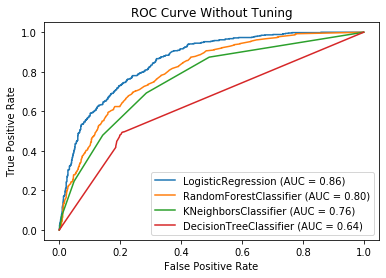

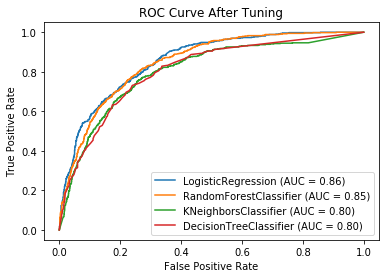

In [36]:
eva_matrix(lr1,lr1_tune,dct1,dct1_tune,rf1,rf1_tune,knn1,knn1_tune,test_X1,test_Y1)

In [37]:
report1 = df_report(lr1,lr1_tune,dct1,dct1_tune,rf1,rf1_tune,knn1,knn1_tune,test_X1,test_Y1)
report1

,Model,AUC,Accuracy,precision,recall,f1-score
0,Logistic Regression,0.856781,0.807736,0.742188,0.543893,0.627753
1,Logistic Regression Tune,0.856174,0.796359,0.661479,0.648855,0.655106
2,Decision Tree,0.640468,0.703072,0.502110,0.454198,0.476954
3,Decision Tree Tune,0.804962,0.718430,0.518331,0.782443,0.623574
4,Random Forest,0.804724,0.758817,0.647059,0.419847,0.509259
5,Random Forest Tune,0.848110,0.793515,0.671642,0.601145,0.634441
6,KNN,0.762049,0.744596,0.587822,0.479008,0.527865
7,KNN Tune,0.802554,0.772469,0.647619,0.519084,0.576271


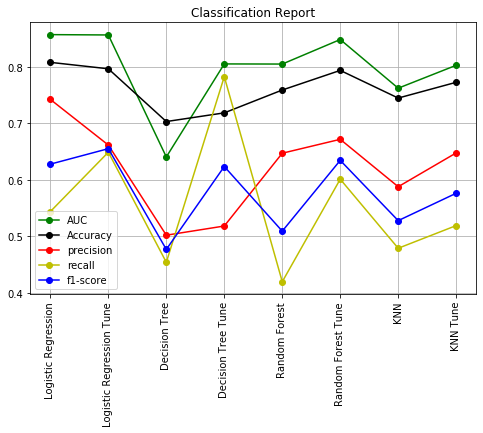

In [38]:
plot_report(report1)

- Berdasarkan grafik di atas, Hyper parameter tuning mampu menaikan __Recall__ dan __F1 Score__ , ini sesuai dengan yang diharapkan karena kita ingin menurunkan False Negatif. Sehingga lebih baik untuk mengklasifikasi label 1 (Churn)
- Meskipun model __Logistic Regression Tune__ memiliki Recall lebih rendah dari Decision Tree Tune, tapi Logistic Regression Tune memiliki AUC dan F1 Score tertinggi, pada percobaan pertama ini Logistic Regression Tune merupakan model terbaik.

### Perbandingan model dengan menghilangkan Feature Monthly Charges dan Total Charges

Pada tahap ini saya ingin melihat apakah dengan membuang feature Monthly Charges dan Total Charges bisa mempengaruhi model atau tidak, saya menggunakan model terbaik sebagai perbandingan

Logistic Regression 1
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1234
           1       0.61      0.71      0.66       524

    accuracy                           0.78      1758
   macro avg       0.74      0.76      0.75      1758
weighted avg       0.79      0.78      0.78      1758

Logistic Regression 2
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1234
           1       0.66      0.65      0.66       524

    accuracy                           0.80      1758
   macro avg       0.76      0.75      0.76      1758
weighted avg       0.80      0.80      0.80      1758



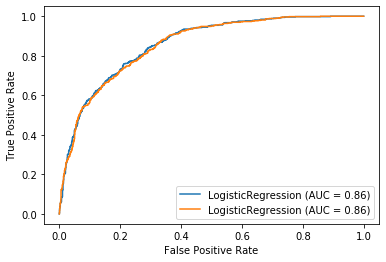

In [39]:
print('Logistic Regression 1\n',classification_report(test_Y,lr_tune.predict(test_X)))
print('Logistic Regression 2\n',classification_report(test_Y1,lr1_tune.predict(test_X1)))

## ROC_AUC
disp = plot_roc_curve(lr_tune,test_X,test_Y)
plot_roc_curve(lr1_tune,test_X1,test_Y1,ax=disp.ax_)

Berdasarkan report klassikasi dan grafik ROC-AUC diatas, dapat disimpulkan bahwa membuang feature Monthly Charges dan Total Charges tidak mempngaruhi model.

<hr>

# 2. Percobaan 2 (Under Sampling)

Dalam dataset ini __class 0__ : 5163, sedangkan __class 1__ : 1869, saya akan menggunakan ```NearMiss``` untuk menyeimbangkan class, teknik ini akan menghapus beberapa sample majority class yaitu __class 0__ sehingga jumlahnya sama dengan minority __class 1__ , ```NearMiss``` akan menghapus majority class yang memiliki jarak terdekat dari minority class.[source](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)

### Balancing Dataset 

In [40]:
telcom['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Saya hanya akan menyeimbangkan data pada data train saja, sehingga saya bisa menggunakan data test yang sama dengan model sebelumnya.

In [41]:
trainX = train_X1.copy()
trainY = train_Y1.copy()
test_X2 = test_X1
test_Y2 = test_Y1
print(len(trainX),len(test_X2))
print(trainY.value_counts())

5274 1758
0    3929
1    1345
Name: Churn, dtype: int64


In [42]:
nm =  NearMiss()
train_X2,train_Y2=nm.fit_sample(trainX,trainY)
train_Y2.value_counts()

1    1345
0    1345
Name: Churn, dtype: int64

### Deklarasi Model

Deklarasi model menggunakan parameter default

In [43]:
### Logistic Regression
lr2 = LogisticRegression()
lr2.fit(train_X2,train_Y2)

## Decision Tree
dct2 = DecisionTreeClassifier()
dct2.fit(train_X2,train_Y2)

### Random Forest
rf2 = RandomForestClassifier()
rf2.fit(train_X2,train_Y2)
### KNN
knn2 = KNeighborsClassifier()
knn2.fit(train_X2,train_Y2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Hyperparameter Tuning

Sedikit berbeda dengan sebelumnya, karena pada model ini saya menggunakan dataset balance, scoring yang digunakan adalah Accuracy

In [44]:
def tuning(model,parameter,n_cv):
    random = RandomizedSearchCV(model, parameter, cv = n_cv, scoring='accuracy')
    random.fit(train_X2,train_Y2)
    best_param = random.best_params_
    
    return best_param

__Parameter Tuning Logistic Regression__

In [45]:
# lr2_tune = LogisticRegression()
# param_lr = {
#     'solver':['newton-cg','lbfgs','liblinear','sag','saga'], ##algoritma Logistic regression
#     'penalty':['none','l1','l2','elasticnet','none'], # regularisasi
#       'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] #strong of regularisasi
# }

# param_best = tuning(lr2_tune,param_lr,5)
# param_best

# {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}

In [46]:
lr2_tune = LogisticRegression(penalty='l2',solver='liblinear',C=0.1)
lr2_tune.fit(train_X2,train_Y2)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

__Parameter Tuning Decision Tree__

In [47]:
# dct2_tune = DecisionTreeClassifier()
# param = {
#     'criterion':['gini','entropy'], ## algoritma tree
#     'max_depth': [int(x) for x in np.linspace(10, 100, 10)],
#     "min_samples_split":[int(x) for x in np.linspace(1, 10, 10)],
#     "min_samples_leaf":[int(x) for x in np.linspace(1, 10, 10)]
# }

# param_best = tuning(dct2_tune,param,5)
# param_best

# {'min_samples_split': 8,
#  'min_samples_leaf': 9,
#  'max_depth': 40,
#  'criterion': 'gini'}

In [48]:
dct2_tune = DecisionTreeClassifier(criterion='gini',min_samples_split=8,min_samples_leaf=9,max_depth=40)
dct2_tune.fit(train_X2,train_Y2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

__Parameter Tuning Random Forest__

In [49]:
# rf2_tune = RandomForestClassifier()
# param_rf= {
#     'n_estimators': [10,50,100], ## jumlah tree
#     'criterion':['gini','entropy'], ## algoritma tree
#     'bootstrap':[False,True],## bootsrap / not
#     'max_depth': [int(x) for x in np.linspace(10, 100, 10)],
#     'min_samples_split':[int(x) for x in np.linspace(1, 10, 10)],
#     'min_samples_leaf':[int(x) for x in np.linspace(1, 10, 10)]
# }
# param_best = tuning(rf2_tune,param_rf,5)
# param_best

# {'n_estimators': 100,
#  'min_samples_split': 8,
#  'min_samples_leaf': 9,
#  'max_depth': 60,
#  'criterion': 'entropy',
#  'bootstrap': True}

In [50]:
rf2_tune = RandomForestClassifier(n_estimators = 100,bootstrap=True,criterion='entropy',min_samples_split=8,
                                 min_samples_leaf=9,max_depth=60)
rf2_tune.fit(train_X2,train_Y2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__Parameter Tuning KNN__

In [51]:
# knn2_tune = KNeighborsClassifier()
# param_knn = {
#         'n_neighbors' : list(range(50,100)), ## jumlah n neighbors
#         'weights':['uniform','distance'], ## one man one vote , lebih dekat lebih berbobot
#         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], # struktur data
# }

# param_best = tuning(knn2_tune,param_knn,5)
# param_best

# {'algorithm': 'auto', 'n_neighbors': 75, 'weights': 'uniform'}

In [52]:
knn2_tune = KNeighborsClassifier(algorithm='auto',n_neighbors=75,weights='uniform')
knn2_tune.fit(train_X2,train_Y2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=75, p=2,
                     weights='uniform')

### Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.87      0.63      0.73      1234
           1       0.47      0.78      0.59       524

    accuracy                           0.68      1758
   macro avg       0.67      0.71      0.66      1758
weighted avg       0.75      0.68      0.69      1758



Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.88      0.63      0.73      1234
           1       0.48      0.79      0.59       524

    accuracy                           0.68      1758
   macro avg       0.68      0.71      0.66      1758
weighted avg       0.76      0.68      0.69      1758


Decision Tree Default
               precision    recall  f1-score   support

           0       0.73      0.49      0.58      1234
           1       0.32      0.58      0.41       524

    accuracy                           0.51      1758
   macro avg       0.53      0.53      0.50  

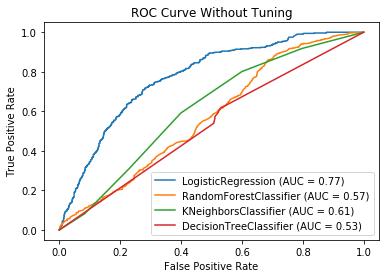

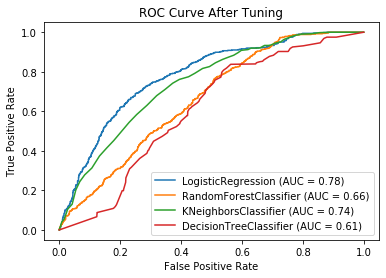

In [53]:
eva_matrix(lr2,lr2_tune,dct2,dct2_tune,rf2,rf2_tune,knn2,knn2_tune,test_X2,test_Y2)

In [54]:
report2 = df_report(lr2,lr2_tune,dct2,dct2_tune,rf2,rf2_tune,knn2,knn2_tune,test_X2,test_Y2)
report2

,Model,AUC,Accuracy,precision,recall,f1-score
0,Logistic Regression,0.773093,0.676337,0.473868,0.778626,0.589170
1,Logistic Regression Tune,0.779772,0.679181,0.476959,0.790076,0.594828
2,Decision Tree,0.529892,0.513652,0.323372,0.578244,0.414784
3,Decision Tree Tune,0.608469,0.581911,0.378035,0.624046,0.470842
4,Random Forest,0.570529,0.503982,0.331068,0.650763,0.438867
5,Random Forest Tune,0.660864,0.550626,0.380396,0.807252,0.517115
6,KNN,0.612268,0.597838,0.386052,0.591603,0.467219
7,KNN Tune,0.741232,0.651877,0.450339,0.761450,0.565957


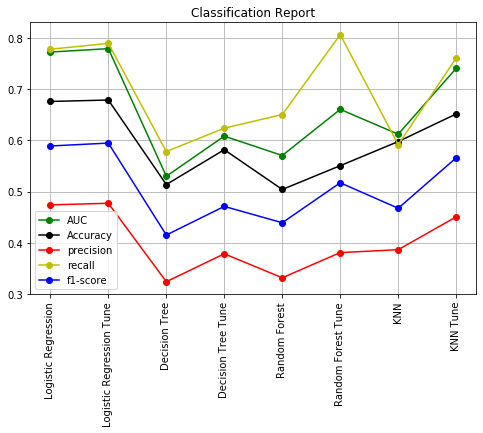

In [55]:
plot_report(report2)

- Pada dataset ini, model yang ditraining menggunakan data balance under sample justru lebih buruk dari model yang ditraining dengan data imbalance
- Pada percobaan kedua ini, model __Logistic Regression Tune__ merupakan model terbaik karena memiliki F1 Score dan AUC tertinggi. Meskipun Recall dibawah Random Forest Tune

<hr>

# 3. Percobaan 3 (Random Over Sampling)

Pada percobaan ke 3 ini saya akan menggunakan ```RandomOverSampler``` untuk menyeimbangkan class, teknik ini akan menduplikasi minority class (__class 1__) secara random sehingga total __class 1__ akan sama dengan majority class  (__class 0__)

### Balancing Dataset 

Sama dengan Under Sample, saya hanya akan menyeimbangkan data train saja, sehingga bisa menggunakan data test yang sama dengan percobaan 1 dan 2, hal ini juga dapat menghindari bias pada dat test.

In [56]:
telcom['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [57]:
trainX = train_X1.copy()
trainY = train_Y1.copy()
test_X3 = test_X1
test_Y3 = test_Y1
print(len(trainX),len(test_X3))
print(trainY.value_counts())

5274 1758
0    3929
1    1345
Name: Churn, dtype: int64


In [58]:
os =  RandomOverSampler(random_state=123)
train_X3,train_Y3=os.fit_sample(trainX,trainY)
print(len(train_X3),len(train_Y3))
train_Y3.value_counts()

7858 7858


1    3929
0    3929
Name: Churn, dtype: int64

### Deklarasi Model

Deklarasi model menggunakan parameter default

In [59]:
### Logistic Regression
lr3 = LogisticRegression()
lr3.fit(train_X3,train_Y3)
### Decision Tree
dct3 = DecisionTreeClassifier()
dct3.fit(train_X3,train_Y3)

## Random Forest
rf3 = RandomForestClassifier()
rf3.fit(train_X3,train_Y3)
## KNN
knn3 = KNeighborsClassifier()
knn3.fit(train_X3,train_Y3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Hyperparameter Tuning

__Parameter Tuning Logistic Regression__

In [60]:
def tuning(model,parameter,n_cv):
    random = RandomizedSearchCV(model, parameter, cv = n_cv,scoring='accuracy')
    random.fit(train_X3,train_Y3)
    best_param = random.best_params_
    
    return best_param

In [61]:
# lr3_tune = LogisticRegression()
# param_lr = {
#     'solver':['newton-cg','lbfgs','liblinear','sag','saga'], ##algoritma Logistic regression
#     'penalty':['none','l1','l2','elasticnet','none'], # regularisasi        
#       'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] #strong of regularisasi
# }

# param_best = tuning(lr3_tune,param_lr,5)
# param_best

# {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1}

In [62]:
lr3_tune = LogisticRegression(solver='newton-cg',penalty='l2',C=1)
lr3_tune.fit(train_X3,train_Y3)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

__Parameter Tuning Decision Tree__

In [63]:
# dct3_tune = DecisionTreeClassifier()
# param = {
#     'criterion':['gini','entropy'], ## algoritma tree
#     'max_depth': [int(x) for x in np.linspace(10, 100, 10)],
#     "min_samples_split":[int(x) for x in np.linspace(1, 10, 10)],
#     "min_samples_leaf":[int(x) for x in np.linspace(1, 10, 10)]
# }

# param_best = tuning(dct3_tune,param,5)
# param_best

# {'min_samples_split': 7,
#  'min_samples_leaf': 3,
#  'max_depth': 60,
#  'criterion': 'entropy'}

In [64]:
dct3_tune = DecisionTreeClassifier(criterion='entropy',min_samples_split=7,min_samples_leaf=3,max_depth=60)
dct3_tune.fit(train_X3,train_Y3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=60, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

__Parameter Tuning Random Forest__

In [65]:
# rf3_tune = RandomForestClassifier()
# param_rf= {
#     'n_estimators': [10,50,100], ## jumlah tree
#     'criterion':['gini','entropy'], ## algoritma tree
#     'bootstrap':[False,True], ## bootsrap / not
#     'max_depth': [int(x) for x in np.linspace(10, 100, 10)],
#     'min_samples_split':[int(x) for x in np.linspace(1, 10, 10)],
#     'min_samples_leaf':[int(x) for x in np.linspace(1, 10, 10)]
# }
# param_best = tuning(rf3_tune,param_rf,5)
# param_best

# {'n_estimators': 50,
#  'min_samples_split': 10,
#  'min_samples_leaf': 3,
#  'max_depth': 50,
#  'criterion': 'entropy',
#  'bootstrap': False}

In [66]:
rf3_tune = RandomForestClassifier(n_estimators = 50,criterion='entropy',bootstrap=False,min_samples_split=10,
                                 min_samples_leaf=3,max_depth=50)
rf3_tune.fit(train_X3,train_Y3)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__Parameter Tuning KNN__

In [67]:
# knn3_tune = KNeighborsClassifier()
# param_knn = {
#         'n_neighbors' : list(range(50,100)), ## jumlah n neighbors
#         'weights':['uniform','distance'], ## one man one vote , lebih dekat lebih berbobot
#         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], # struktur data
# }

# param_best = tuning(knn3_tune,param_knn,5)
# param_best

# {'weights': 'distance', 'n_neighbors': 50, 'algorithm': 'auto'}

In [68]:
knn3_tune = KNeighborsClassifier(weights='distance',n_neighbors=50,algorithm='auto')
knn3_tune.fit(train_X3,train_Y3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='distance')

### Final Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1234
           1       0.56      0.79      0.66       524

    accuracy                           0.75      1758
   macro avg       0.73      0.76      0.73      1758
weighted avg       0.79      0.75      0.76      1758



Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1234
           1       0.56      0.79      0.66       524

    accuracy                           0.75      1758
   macro avg       0.73      0.76      0.73      1758
weighted avg       0.79      0.75      0.76      1758


Decision Tree Default
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1234
           1       0.52      0.48      0.50       524

    accuracy                           0.71      1758
   macro avg       0.65      0.64      0.65  

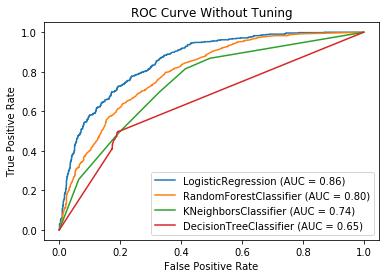

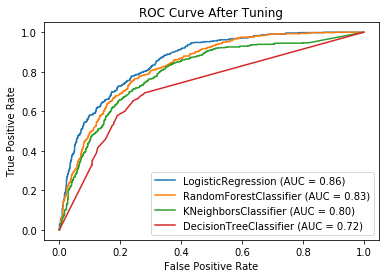

In [69]:
eva_matrix(lr3,lr3_tune,dct3,dct3_tune,rf3,rf3_tune,knn3,knn3_tune,test_X3,test_Y3)

In [70]:
report3 = df_report(lr3,lr3_tune,dct3,dct3_tune,rf3,rf3_tune,knn3,knn3_tune,test_X3,test_Y3)
report3

,Model,AUC,Accuracy,precision,recall,f1-score
0,Logistic Regression,0.855692,0.754835,0.563611,0.786260,0.656574
1,Logistic Regression Tune,0.855696,0.754835,0.563611,0.786260,0.656574
2,Decision Tree,0.648497,0.711604,0.517598,0.477099,0.496524
3,Decision Tree Tune,0.722310,0.741183,0.564246,0.578244,0.571159
4,Random Forest,0.797681,0.754266,0.599567,0.528626,0.561866
5,Random Forest Tune,0.830036,0.775882,0.614437,0.666031,0.639194
6,KNN,0.740889,0.679181,0.474026,0.696565,0.564142
7,KNN Tune,0.796167,0.709329,0.507975,0.790076,0.618372


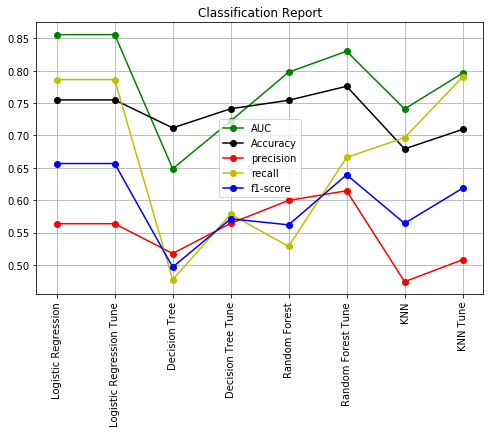

In [71]:
plot_report(report3)

- Hyper parameter tuning tidak berpengaruh pada model Logistic Regression.
- Berdasarkan grafik di atas, model __Logistic Regression__ merupakan model terbaik dengan Recall, F1 Score, dan AUC tertinggi

<hr>

# 4. Percobaan 4 (SMOTE)

Pada percobaan ke 4 ini saya akan menggunakan ```SMOTE``` untuk menyeimbangkan class sehingga minority class akan memiliki jumlah yang sama dengan majority class, berbeda dengan Random Over Sample, SMOTE membuat instance data baru berdasarkan jarak euclidian terdekat, teknik ini mengadopsi algoritma K-Nearest Neighbors.[source](http://etd.repository.ugm.ac.id/home/detail_pencarian/157692)

### Balancing Dataset 

In [72]:
telcom['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [73]:
trainX = train_X1.copy()
trainY = train_Y1.copy()
test_X4 = test_X1
test_Y4 = test_Y1
print(len(trainX),len(test_X4))
print(trainY.value_counts())

5274 1758
0    3929
1    1345
Name: Churn, dtype: int64


In [74]:
os =  SMOTE(random_state=123)
train_X4,train_Y4=os.fit_sample(trainX,trainY)
print(len(train_X4),len(train_Y4))
train_Y4.value_counts()

7858 7858


1    3929
0    3929
Name: Churn, dtype: int64

### Deklarasi Model

Deklarasi model menggunakan parameter default

In [75]:
### Logistic Regression
lr4 = LogisticRegression()
lr4.fit(train_X4,train_Y4)
### Decision Tree
dct4 = DecisionTreeClassifier()
dct4.fit(train_X4,train_Y4)

## Random Forest
rf4 = RandomForestClassifier()
rf4.fit(train_X4,train_Y4)
## KNN
knn4 = KNeighborsClassifier()
knn4.fit(train_X4,train_Y4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Hyperparameter Tuning

__Parameter Tuning Logistic Regression__

In [76]:
def tuning(model,parameter,n_cv):
    random = RandomizedSearchCV(model, parameter, cv = n_cv,scoring='accuracy')
    random.fit(train_X4,train_Y4)
    best_param = random.best_params_
    
    return best_param

In [77]:
# lr4_tune = LogisticRegression()
# param_lr = {
#     'solver':['newton-cg','lbfgs','liblinear','sag','saga'], ##algoritma Logistic regression
#     'penalty':['none','l1','l2','elasticnet','none'], # regularisasi   
#       'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] #strong of regularisasi
# }

# param_best = tuning(lr4_tune,param_lr,5)
# param_best

# {'solver': 'newton-cg', 'penalty': 'none', 'C': 10}

In [78]:
lr4_tune = LogisticRegression(solver='lbfgs',penalty='none',C=10)
lr4_tune.fit(train_X4,train_Y4)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

__Parameter Tuning Decision Tree__

In [79]:
# dct4_tune = DecisionTreeClassifier()
# param = {
#     'criterion':['gini','entropy'], ## algoritma tree
#     'max_depth': [int(x) for x in np.linspace(10, 100, 10)],
#     "min_samples_split":[int(x) for x in np.linspace(1, 10, 10)],
#     "min_samples_leaf":[int(x) for x in np.linspace(1, 10, 10)]
# }

# param_best = tuning(dct4_tune,param,5)
# param_best

# {'min_samples_split': 5,
#  'min_samples_leaf': 3,
#  'max_depth': 90,
#  'criterion': 'gini'}

In [80]:
dct4_tune = DecisionTreeClassifier(criterion='gini',min_samples_split=5,min_samples_leaf=3,max_depth=90)
dct4_tune.fit(train_X4,train_Y4)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=90, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

__Parameter Tuning Random Forest__

In [81]:
# rf4_tune = RandomForestClassifier()
# param_rf= {
#     'n_estimators': [10,50,100], ## jumlah tree
#     'criterion':['gini','entropy'], ## algoritma tree
#     'bootstrap':[False,True],## bootsrap / not
#     'max_depth': [int(x) for x in np.linspace(10, 100, 10)],
#     'min_samples_split':[int(x) for x in np.linspace(1, 10, 10)],
#     'min_samples_leaf':[int(x) for x in np.linspace(1, 10, 10)]
# }
# param_best = tuning(rf4_tune,param_rf,5)
# param_best

# {'n_estimators': 10,
#  'min_samples_split': 4,
#  'min_samples_leaf': 1,
#  'max_depth': 60,
#  'criterion': 'entropy',
#  'bootstrap': True}

In [82]:
rf4_tune = RandomForestClassifier(n_estimators = 10,criterion='entropy',bootstrap=True,min_samples_split=4,
                                 min_samples_leaf=1,max_depth=60)
rf4_tune.fit(train_X4,train_Y4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__Parameter Tuning KNN__

In [83]:
# knn4_tune = KNeighborsClassifier()
# param_knn = {
#         'n_neighbors' : list(range(50,100)), ## jumlah n neighbors
#         'weights':['uniform','distance'], ## one man one vote , lebih dekat lebih berbobot
#         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], # struktur data
# }

# param_best = tuning(knn4_tune,param_knn,5)
# param_best

# {'weights': 'distance', 'n_neighbors': 54, 'algorithm': 'brute'}

In [84]:
knn4_tune = KNeighborsClassifier(weights='distance',n_neighbors=54,algorithm='brute')
knn4_tune.fit(train_X4,train_Y4)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=54, p=2,
                     weights='distance')

### Final Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1234
           1       0.64      0.66      0.65       524

    accuracy                           0.79      1758
   macro avg       0.75      0.75      0.75      1758
weighted avg       0.79      0.79      0.79      1758



Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1234
           1       0.65      0.63      0.64       524

    accuracy                           0.79      1758
   macro avg       0.75      0.74      0.75      1758
weighted avg       0.79      0.79      0.79      1758


Decision Tree Default
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1234
           1       0.52      0.53      0.53       524

    accuracy                           0.71      1758
   macro avg       0.66      0.66      0.66  

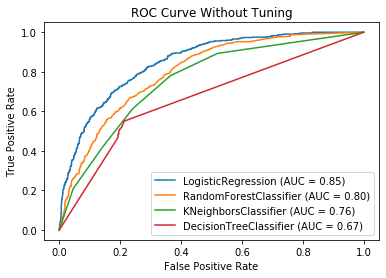

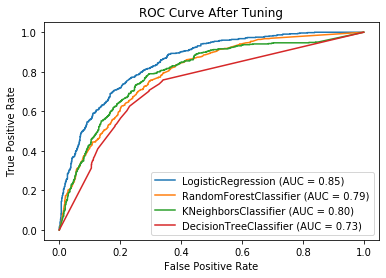

In [85]:
eva_matrix(lr4,lr4_tune,dct4,dct4_tune,rf4,rf4_tune,knn4,knn4_tune,test_X4,test_Y4)

In [86]:
report4 = df_report(lr4,lr4_tune,dct4,dct4_tune,rf4,rf4_tune,knn4,knn4_tune,test_X4,test_Y4)
report4

,Model,AUC,Accuracy,precision,recall,f1-score
0,Logistic Regression,0.850206,0.786689,0.638219,0.656489,0.647225
1,Logistic Regression Tune,0.850325,0.789534,0.650980,0.633588,0.642166
2,Decision Tree,0.665469,0.713879,0.519626,0.530534,0.525024
3,Decision Tree Tune,0.733914,0.729238,0.544118,0.564885,0.554307
4,Random Forest,0.798908,0.757110,0.602105,0.545802,0.572573
5,Random Forest Tune,0.794466,0.744027,0.575203,0.540076,0.557087
6,KNN,0.756427,0.715586,0.519417,0.612595,0.562172
7,KNN Tune,0.795666,0.730944,0.533246,0.780534,0.633617


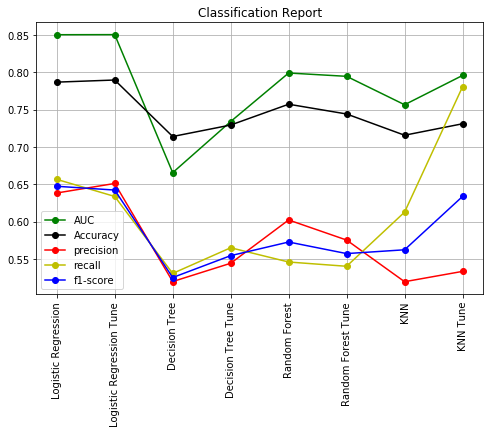

In [87]:
plot_report(report4)

- Berdasarkan grafik di atas, model __Logistic Regression__ dengan parameter default merupakan model terbaik dengan Recall, F1 Score, dan AUC tertinggi

<hr>

# Best Model

Saya akan memilih model terbaik dengan membandingkan model terbaik dari tiap percobaan.

1. Model terbaik yang ditraining dengan dataset imbalance adalah Logistic Regression setelah tuning parameter.
2. Model terbaik yang ditraining dengan balance dataset Under Sample adalah Logistic Regression setelah tuning parameter.
3. Model terbaik yang ditraining dengan balance dataset Random Over Sample adalah Logistic Regression setelah tuning parameter.
4. Model terbaik yang ditraining dengan balance dataset SMOTE adalah Logistic Regression dengan default parameter.

In [88]:
## ROC-AUC
a = roc_auc_score(test_Y1, lr1_tune.predict_proba(test_X1)[:,1])
b = roc_auc_score(test_Y2, lr2_tune.predict_proba(test_X2)[:,1])
c = roc_auc_score(test_Y3, lr3_tune.predict_proba(test_X3)[:,1])
d = roc_auc_score(test_Y4, lr4.predict_proba(test_X4)[:,1])

## Accuracy

e = classification_report(test_Y1,lr1_tune.predict(test_X1),output_dict=True)['accuracy']
f = classification_report(test_Y2,lr2_tune.predict(test_X2),output_dict=True)['accuracy']
g = classification_report(test_Y3,lr3_tune.predict(test_X3),output_dict=True)['accuracy']
h = classification_report(test_Y4,lr4.predict(test_X4),output_dict=True)['accuracy']

## Precision,Recall,F1

i = classification_report(test_Y1,lr1_tune.predict(test_X1),output_dict=True)['1']
j = classification_report(test_Y2,lr2_tune.predict(test_X2),output_dict=True)['1']
k = classification_report(test_Y3,lr3_tune.predict(test_X3),output_dict=True)['1']
l = classification_report(test_Y4,lr4.predict(test_X4),output_dict=True)['1']

model = pd.DataFrame({'Model':['Logistic Regression1','Logistic Regression2','Logistic Regression3','Logistic Regression4'],
                      'AUC':[a,b,c,d],
                      'Accuracy':[e,f,g,h]})
report = pd.DataFrame([i,j,k,l])
report.drop(columns='support',inplace=True)
report5 = pd.concat([model,report],axis=1)
report5

,Model,AUC,Accuracy,precision,recall,f1-score
0,Logistic Regression1,0.856174,0.796359,0.661479,0.648855,0.655106
1,Logistic Regression2,0.779772,0.679181,0.476959,0.790076,0.594828
2,Logistic Regression3,0.855696,0.754835,0.563611,0.786260,0.656574
3,Logistic Regression4,0.850206,0.786689,0.638219,0.656489,0.647225


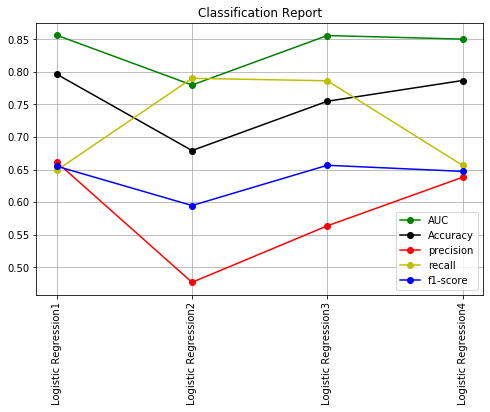

In [89]:
plt.figure(figsize=(8,5))
plt.plot(report5['Model'], report5['AUC'],'g-o',label='AUC')
plt.plot(report5['Model'], report5['Accuracy'],'k-o',label='Accuracy')
plt.plot(report5['Model'], report5['precision'],'r-o',label='precision')
plt.plot(report5['Model'], report5['recall'],'y-o',label='recall')
plt.plot(report5['Model'], report5['f1-score'],'b-o',label='f1-score')
plt.xticks(rotation=90);plt.title('Classification Report')
plt.grid(True)
plt.legend()
plt.show()

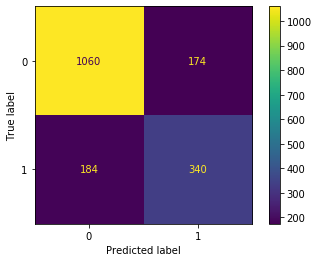

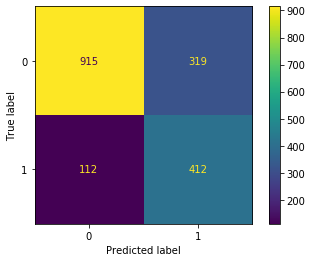

In [90]:
plot_confusion_matrix(lr1_tune,test_X1,test_Y1,values_format='0.0f')
plot_confusion_matrix(lr3_tune,test_X3,test_Y3,values_format='0.0f')

- Model Logistic Regression 1 dan Logistic Regression 3 memiliki score yang hampir sama, tapi Logistic Regression 3 memiliki score __Recall(1)/Sensitivity__ lebih besar dari Logistic Regression 1, ini berarti Logistic Regression memiliki probability False Negatif lebih rendah dan probability True Positif lebih tinggi seperti ditunjukan pada tabel confusion matrix di atas.
- Saya memilih model Logistic Regression 3, yaitu model yang kita train dengan data balance over sample sebagai model terbaik.

## Feature Importances

In [112]:
coef = lr3_tune.coef_[0]
cols = train_X3.columns
df_coef = pd.DataFrame ({'Feature':cols,'Coef':coef})
df_coef = df_coef.sort_values(by='Coef',ascending=False).reset_index().drop(columns='index')
df_coef.head()

,Feature,Coef
0,Contract_Month-to-month,0.597166
1,InternetService_Fiber optic,0.491678
2,StreamingTV_Yes,0.285261
3,PaymentMethod_Electronic check,0.268093
4,PaperlessBilling,0.264634


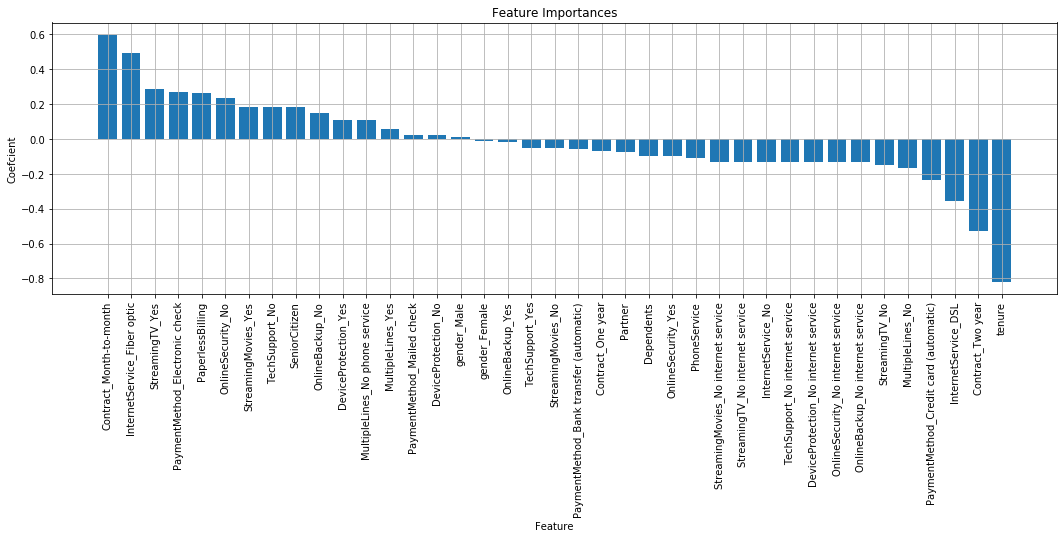

In [114]:
plt.figure(figsize=(18,5))
plt.bar(df_coef['Feature'],df_coef['Coef'])
plt.xticks(rotation=90);plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Coefcient')
plt.grid(True)
plt.show()

- 5 Feature penting dalam model ini adalah tenure,Contract,Internet Service,Payment Method, dan Streaming TV
- Seperti disampaikan dalam notebook EDA, feature gender tidak mempunyai pengaruh besar terhadap customer churn, namun saya memilih untuk tetap mempertahankan dalam model ini.

## Cek for OverFitting/UnderFitting

In [91]:
print('Logistic Regression Training\n',classification_report(train_Y3,lr3_tune.predict(train_X3)))
print('Logistic Regression Testing\n',classification_report(test_Y3,lr3_tune.predict(test_X3)))

Logistic Regression Training
               precision    recall  f1-score   support

           0       0.78      0.73      0.76      3929
           1       0.75      0.80      0.77      3929

    accuracy                           0.76      7858
   macro avg       0.77      0.76      0.76      7858
weighted avg       0.77      0.76      0.76      7858

Logistic Regression Testing
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1234
           1       0.56      0.79      0.66       524

    accuracy                           0.75      1758
   macro avg       0.73      0.76      0.73      1758
weighted avg       0.79      0.75      0.76      1758



- Model Logistic Regression tidak over fitting

# Save Model

In [92]:
import joblib

In [93]:
joblib.dump(lr3_tune,'lr_best_model')

['lr_best_model']